# Metro Network Analysis

In [68]:
: by - Nitin Yadav

': by - Nitin Yadav'

## Analysing the Delhi Metro Rail Corporation Network Data from 2008-2019

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('dataset/Delhi-Metro-Network.csv')
df

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054


In [3]:
df.shape

(285, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [6]:
df.describe()

,Station ID,Distance from Start (km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,143.000000,19.218947,28.595428,77.029315
std,82.416625,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,72.000000,7.300000,28.545828,77.107130
50%,143.000000,17.400000,28.613453,77.207220
75%,214.000000,28.800000,28.666360,77.281165
max,285.000000,52.700000,28.878965,77.554479


In [7]:
df.isnull().sum()

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [8]:
from seaborn import pairplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
print(df['Line'].unique()) #finding the list of lines in the dataset

['Red line' 'Pink line' 'Rapid Metro' 'Magenta line' 'Blue line'
 'Aqua line' 'Voilet line' 'Yellow line' 'Green line' 'Gray line'
 'Orange line' 'Green line branch' 'Blue line branch']


In [37]:
#defining relevant colours to the metro lines
line_colors = {
    'Red line': 'red',
    'Pink line': 'pink',
    'Rapid Metro': 'silver',
    'Magenta line': 'magenta',
    'Blue line': 'blue',
    'Aqua line': 'skyblue',
    'Voilet line': 'purple',
    'Yellow line': 'yellow',
    'Green line': 'darkgreen',
    'Gray line': 'gray',
    'Orange line': 'orange',
    'Green line branch': 'green',
    'Blue line branch': 'navy'
}

In [22]:
line_counts = df['Line'].value_counts()
line_counts

Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: Line, dtype: int64

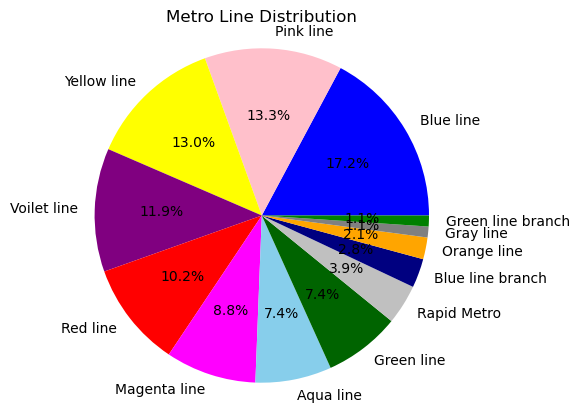

In [38]:
#Drawing pie-chart to get to know about overall composition of the DMRC Network
plt.pie(line_counts, labels=line_counts.index, autopct='%1.1f%%', colors=[line_colors[line] for line in line_counts.index])
plt.axis('equal')
plt.title('Metro Line Distribution')
plt.show()

In [39]:
line_counts_df = line_counts.reset_index()
line_counts_df.columns = ['Line', 'Station Count']
colors = line_counts_df['Line'].map(line_colors)

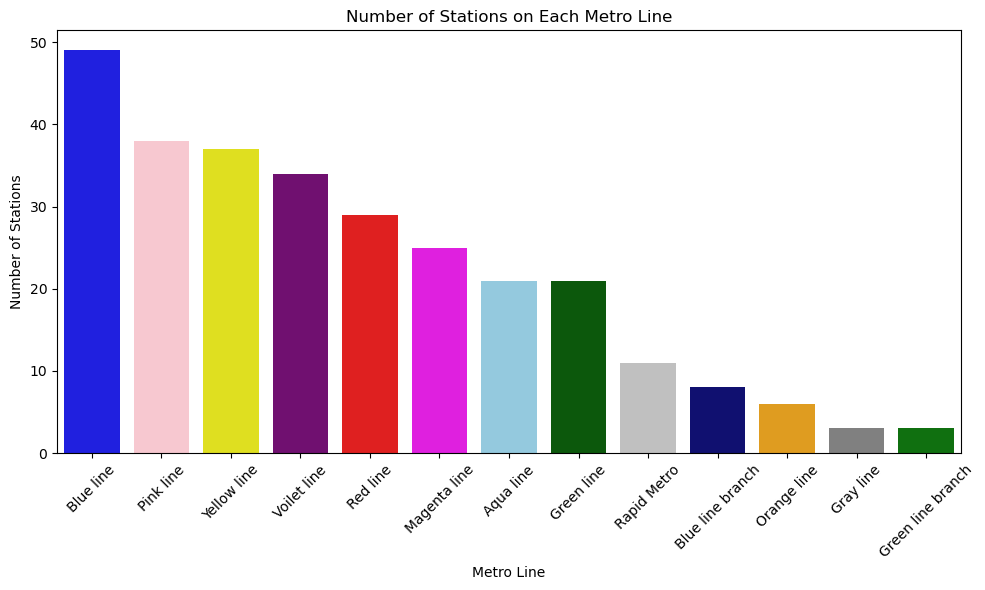

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Line', y='Station Count', data=line_counts_df, palette=colors)

# Add labels and title
plt.xlabel('Metro Line')
plt.ylabel('Number of Stations')
plt.title('Number of Stations on Each Metro Line')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [41]:
# Group by 'Line' and sum the distances
distance_by_line = df.groupby('Line')['Distance from Start (km)'].sum().reset_index()

# Rename columns for clarity
distance_by_line.columns = ['Line', 'Total Distance Covered (km)']


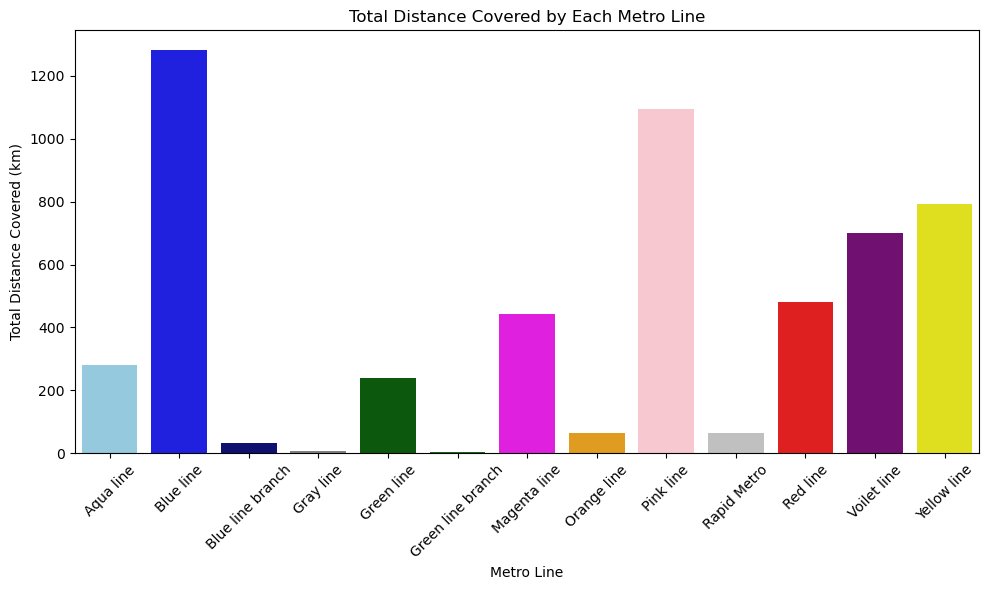

In [42]:
# Map the colors to the respective metro lines
colors = distance_by_line['Line'].map(line_colors)

# Create the barplot for total distance covered
plt.figure(figsize=(10, 6))
sns.barplot(x='Line', y='Total Distance Covered (km)', data=distance_by_line, palette=colors)

# Add labels and title
plt.xlabel('Metro Line')
plt.ylabel('Total Distance Covered (km)')
plt.title('Total Distance Covered by Each Metro Line')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [44]:
!pip install folium

     ------------------------------------ 108.4/108.4 kB 417.8 kB/s eta 0:00:00
     -------------------------------------- 85.1/85.1 kB 184.5 kB/s eta 0:00:00
  Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [64]:
#Plotting the stations on map to get to know about overall coverage of the metro lines and DMRC network
import folium

# Create a base map centered around the first station's coordinates
center_lat, center_lon = df['Latitude'].mean(), df['Longitude'].mean()
mymap = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# Iterate through the dataframe and plot each station on the map
for index, row in df.iterrows():
    # Get station details
    station_name = row['Station Name']
    line_name = row['Line']
    lat = row['Latitude']
    lon = row['Longitude']
    
    # Get color from the line_colors dictionary
    color = line_colors.get(line_name, 'black')  # Use 'black' if line not found in the dictionary
    
    # Create a marker on the map
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=station_name
    ).add_to(mymap)

# Save the map to an HTML file and display it
mymap.save('metro_stations_map.html')
mymap


In [50]:
# Convert 'Opening Date' to datetime if it's not already
df['Opening Date'] = pd.to_datetime(df['Opening Date'])

# Extract the year from the 'Opening Date' column
df['Opening Year'] = df['Opening Date'].dt.year

# Group by 'Opening Year' and 'Station Layout', and count the number of stations
stations_by_year_layout = df.groupby(['Opening Year', 'Station Layout']).size().reset_index(name='Station Count')


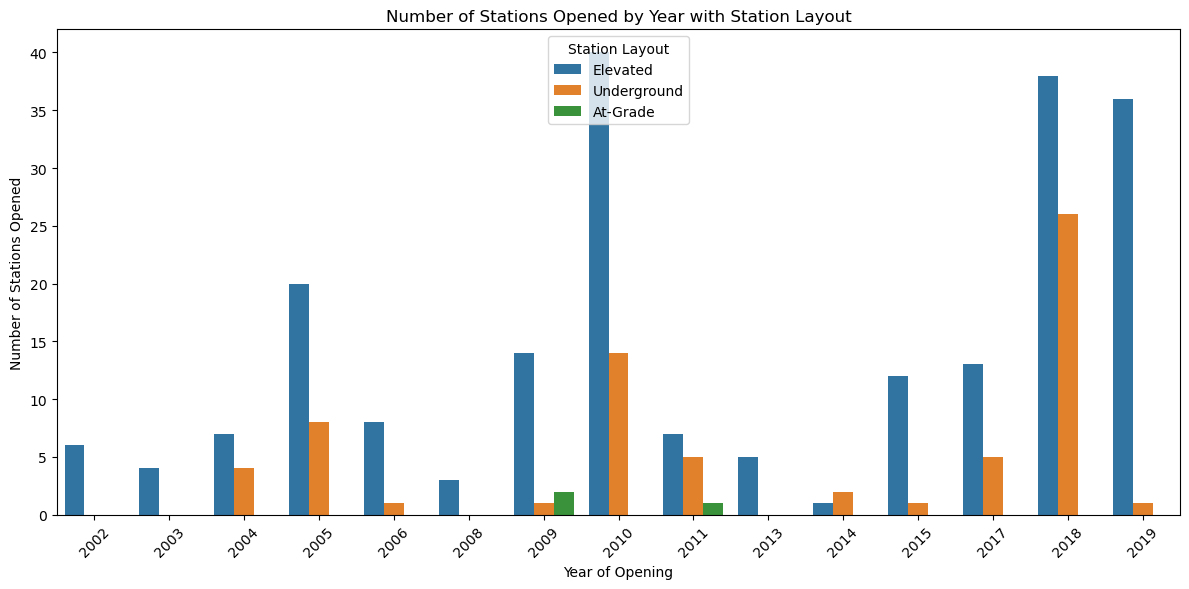

In [52]:
#knowing about which type of Station Layout DMRC emphasized on during the past years
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Opening Year', y='Station Count', hue='Station Layout', data=stations_by_year_layout)

# Add labels and title
plt.xlabel('Year of Opening')
plt.ylabel('Number of Stations Opened')
plt.title('Number of Stations Opened by Year with Station Layout')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

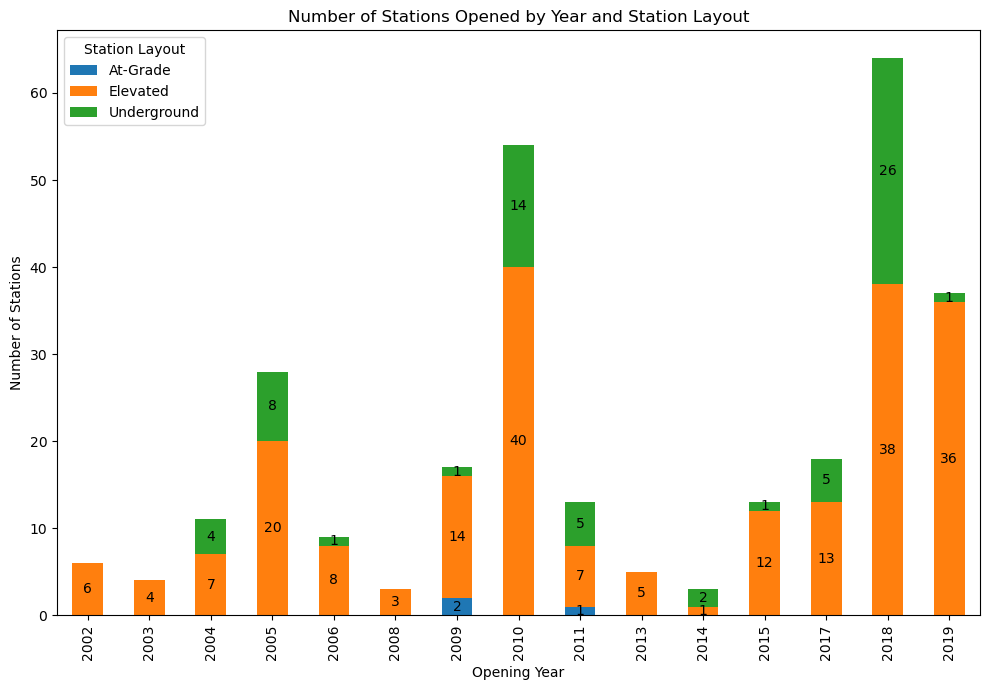

In [59]:
# Create a pivot table to plot stacked bars
stations_pivot = stations_by_year_layout.pivot(index='Opening Year', columns='Station Layout', values='Station Count').fillna(0)

# Plotting the stacked bar chart
stations_pivot.plot(kind='bar', stacked=True, figsize=(10,7))

# Add labels, title, and legend
plt.xlabel('Opening Year')
plt.ylabel('Number of Stations')
plt.title('Number of Stations Opened by Year and Station Layout')

# Annotate the counts on top of each bar
for i in range(stations_pivot.shape[0]):
    for j, layout in enumerate(stations_pivot.columns):
        if stations_pivot.iloc[i, j] > 0:
            plt.text(i, stations_pivot.iloc[i, :j+1].sum() - stations_pivot.iloc[i, j]/2,
                     str(int(stations_pivot.iloc[i, j])),
                     ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

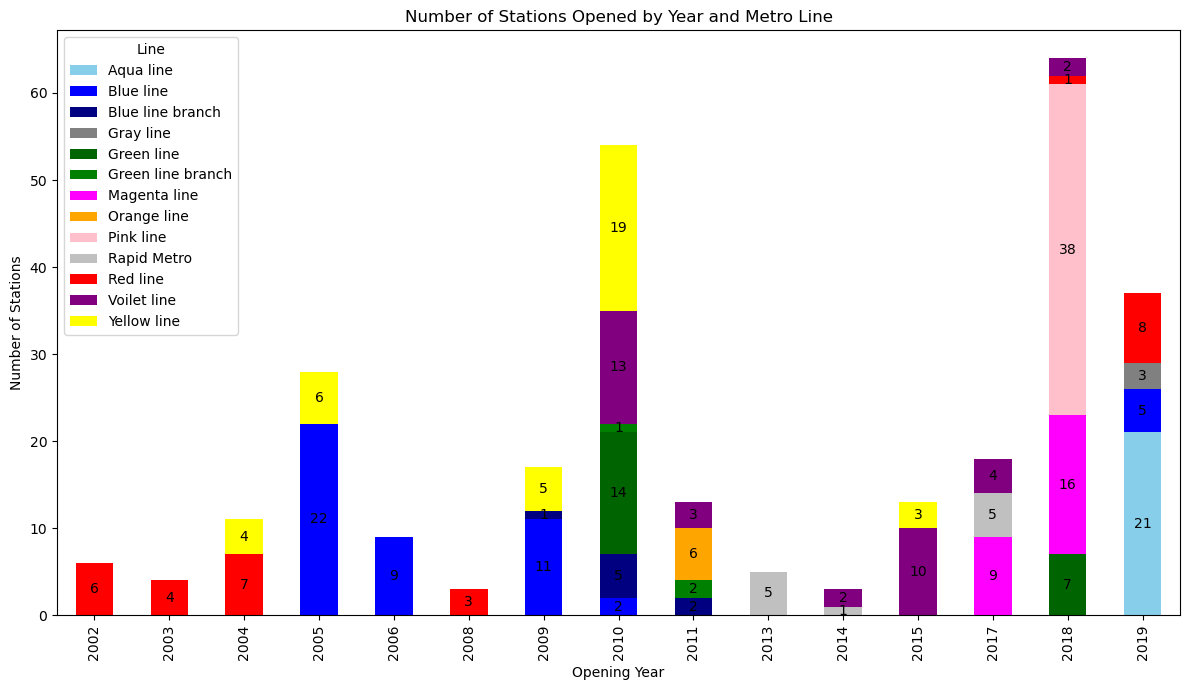

In [65]:
#Comparing the addition/extention of metro lines over the time to know about the full line construction and development period

# Group by 'Opening Year' and 'Line' to get the count of stations opened per year for each line
stations_by_year_line = df.groupby(['Opening Year', 'Line']).size().reset_index(name='Station Count')

# Create a pivot table to plot stacked bars
stations_pivot = stations_by_year_line.pivot(index='Opening Year', columns='Line', values='Station Count').fillna(0)

# Get the colors for each line from the 'line_colors' dictionary
line_colors_list = [line_colors.get(line, 'black') for line in stations_pivot.columns]

# Plotting the stacked bar chart
stations_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), color=line_colors_list)

# Add labels, title, and legend
plt.xlabel('Opening Year')
plt.ylabel('Number of Stations')
plt.title('Number of Stations Opened by Year and Metro Line')

# Annotate the counts on top of each bar
for i in range(stations_pivot.shape[0]):
    for j, line in enumerate(stations_pivot.columns):
        if stations_pivot.iloc[i, j] > 0:
            plt.text(i, stations_pivot.iloc[i, :j+1].sum() - stations_pivot.iloc[i, j]/2,
                     str(int(stations_pivot.iloc[i, j])),
                     ha='center', va='center', color='black')

# Display the plot
plt.tight_layout()
plt.show()